## Predicting Global CO2 Emissions

Global Data on Sustainable Energy (2000-2020) Dataset: https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy?resource=download


In [55]:
import numpy as np #create arrays
import pandas as pd #for data analysis
import seaborn as sns #for visualisation 
import matplotlib.pyplot as plt #for visualisation
%matplotlib inline

import warnings #suppress warnings
warnings.filterwarnings('ignore')



### Data Structure

In [4]:
#load dataset
df = pd.read_csv('global-data-on-sustainable-energy.csv')
df.head() #show top 5 rows of data

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN         NaN             NaN   
1                                       NaN         NaN             NaN   
2                                       NaN         NaN      179.426579   
3                                       NaN    8.832278      190.683814   
4                                       NaN    1.414118      211.382074   

   Density\n(P/Km2) Land Area(Km2)  Latitude  Longitude  
0                60       652230.0  33.93911  67.709953  
1          

In [5]:
# Check information about dataset structure and contents
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

(3649, 21)

3649 rows of data, 21 variables,
19 are numerical variables,
1 string (Entity = Country).
Density is in the wrong data type and needs converting to numeric. Some of the column names could be renamed to make them clearer.

### Data Cleaning

In [6]:
#Rename some columns
df.rename(columns={"Value_co2_emissions_kt_by_country":"CO2 Emissions (metric tons per capita)" , 'Entity' : 'Country', 'Density\\n(P/Km2)': 'Density (P/Km2)'} , inplace=True)

In [7]:
# change Density to numeric value, remove the comma and fill any NaN values with 0 so that it can be converted to numeric 
df['Density (P/Km2)'] = df['Density (P/Km2)'].str.replace(',', '').fillna(0).astype(float)

In [8]:
#drop columns as not needed
df = df.drop(columns = ['Latitude', 'Longitude'])

In [9]:
#check changes in data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country                                                           3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

#### Check for duplicates

In [10]:
#check for duplicated rows in data
df[df.duplicated()] 

Empty DataFrame
Columns: [Country, Year, Access to electricity (% of population), Access to clean fuels for cooking, Renewable-electricity-generating-capacity-per-capita, Financial flows to developing countries (US $), Renewable energy share in the total final energy consumption (%), Electricity from fossil fuels (TWh), Electricity from nuclear (TWh), Electricity from renewables (TWh), Low-carbon electricity (% electricity), Primary energy consumption per capita (kWh/person), Energy intensity level of primary energy (MJ/$2017 PPP GDP), CO2 Emissions (metric tons per capita), Renewables (% equivalent primary energy), gdp_growth, gdp_per_capita, Density (P/Km2), Land Area(Km2)]
Index: []

No duplicated rows

#### Check and handle missing values

In [11]:
#Check for missing values
df.isna().sum() #check for missing values

Country                                                                0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
CO2 Emissions (metric tons per capita)             

There are a lot of missing values for some variables. 

In [12]:
# Remove any rows that have missing CO2 emission data
df.dropna(axis=0, subset=['CO2 Emissions (metric tons per capita)'], inplace=True)

In [13]:
#replace missing values with the median on numerical columns
df_num = df.select_dtypes(include=[np.number])
df[df_num.columns] = df_num.fillna(df_num.median())#use median due to skewed data and outliers

In [14]:
#Check again for missing values
df.isna().sum() #check for missing values

Country                                                             0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
CO2 Emissions (metric tons per capita)                              0
Renewables (% equiva

In [15]:
#summarise data with missing values imputed
df.describe()

Year  Access to electricity (% of population)  \
count  3221.000000                              3221.000000   
mean   2009.510711                                78.064125   
std       5.751880                                30.935466   
min    2000.000000                                 1.252269   
25%    2005.000000                                56.900000   
50%    2010.000000                                97.900000   
75%    2014.000000                               100.000000   
max    2019.000000                               100.000000   

       Access to clean fuels for cooking  \
count                        3221.000000   
mean                           62.940158   
std                            38.729200   
min                             0.000000   
25%                            23.400000   
50%                            81.500000   
75%                           100.000000   
max                           100.000000   

       Renewable-electricity-generating-capacity-per-capita  \
count                                        3221.000000      
mean                                           88.630182      
std                                           210.855602      
min                                             0.000000      
25%                                             8.460000      
50%                                            30.115000      
75%                                            65.610000      
max                                          3060.190000      

       Financial flows to developing countries (US $)  \
count                                    3.221000e+03   
mean                                     4.457844e+07   
std                                      2.046506e+08   
min                                      0.000000e+00   
25%                                      5.620000e+06   
50%                                      5.620000e+06   
75%                                      5.620000e+06   
max                                      5.202310e+09   

       Renewable energy share in the total final energy consumption (%)  \
count                                        3221.000000                  
mean                                           33.827218                  
std                                            30.068334                  
min                                             0.000000                  
25%                                             7.280000                  
50%                                            25.580000                  
75%                                            56.700000                  
max                                            96.040000                  

       Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
count                          3221.000000                     3221.000000   
mean                             72.851208                       13.920003   
std                             354.203364                       74.478653   
min                               0.000000                        0.000000   
25%                               0.300000                        0.000000   
50%                               3.100000                        0.000000   
75%                              27.570000                        0.000000   
max                            5098.220000                      809.410000   

       Electricity from renewables (TWh)  \
count                        3221.000000   
mean                           24.272459   
std                           101.831308   
min                             0.000000   
25%                             0.060000   
50%                             1.590000   
75%                             9.410000   
max                          2014.570000   

       Low-carbon electricity (% electricity)  \
count                             3221.000000   
mean                                37.531706   
std                                 34.13336

Data is from 2000-2019, 2020 had no CO2 emission values so was removed.
There are 3221 records, 
CO2 Emissions are on average 1.60 (SD = 7.74) metric tons per capita.

### Exploratory Data Analysis (EDA)

#### Check distribution of data

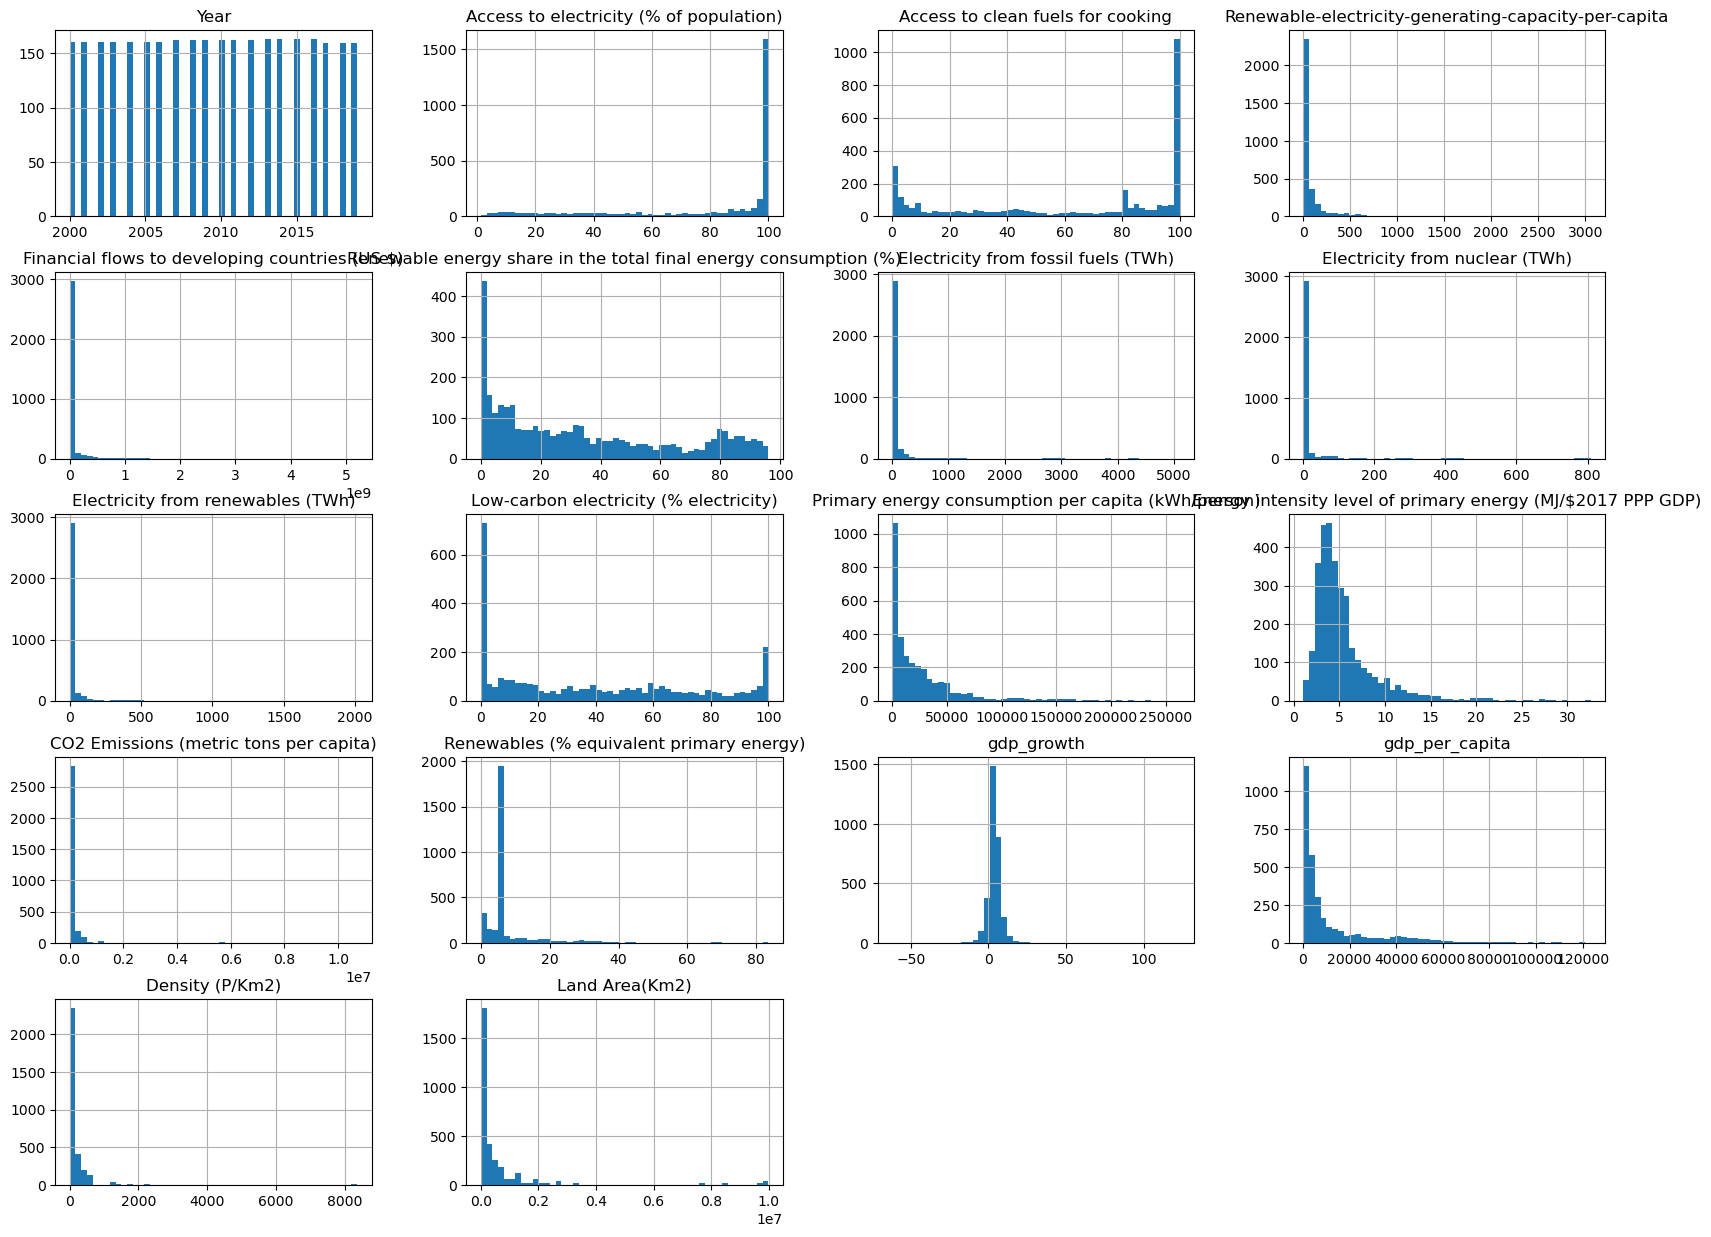

In [16]:
#Check distribution of data
df.hist(bins=50, figsize=(20,15)) #create histogram
plt.show()


Many of the variables are skewed. Some are normal such as energy intensity and GDP growth.

#### Check for outliers

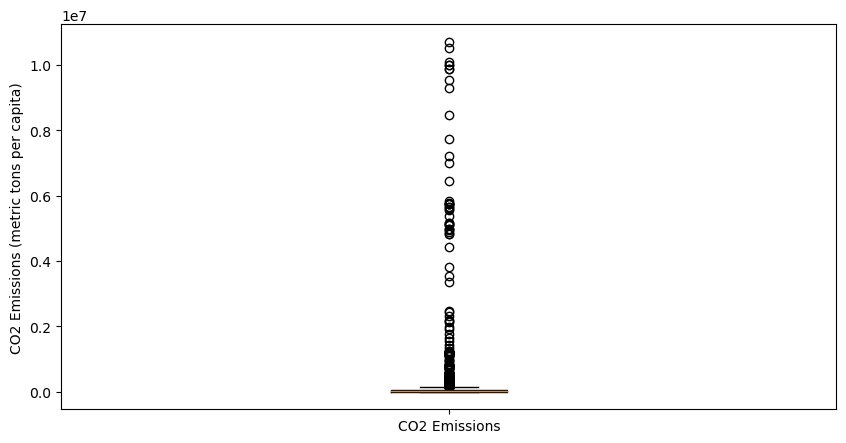

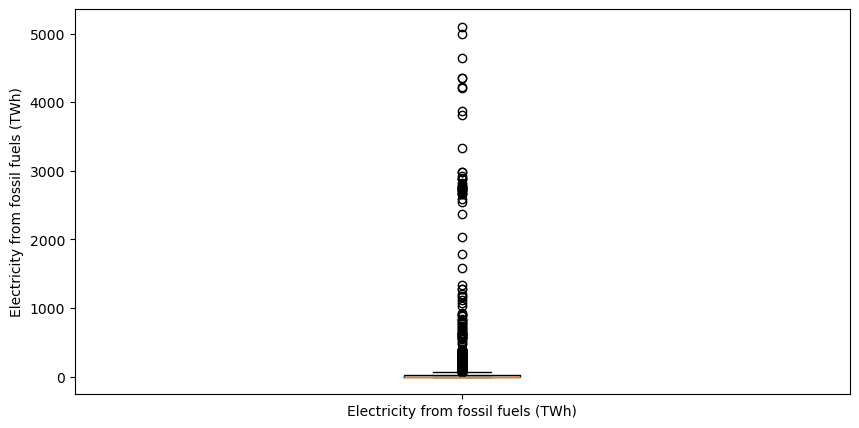

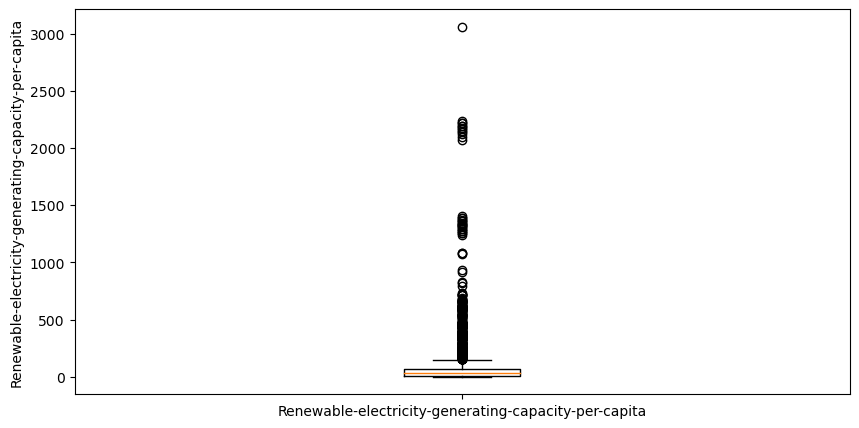

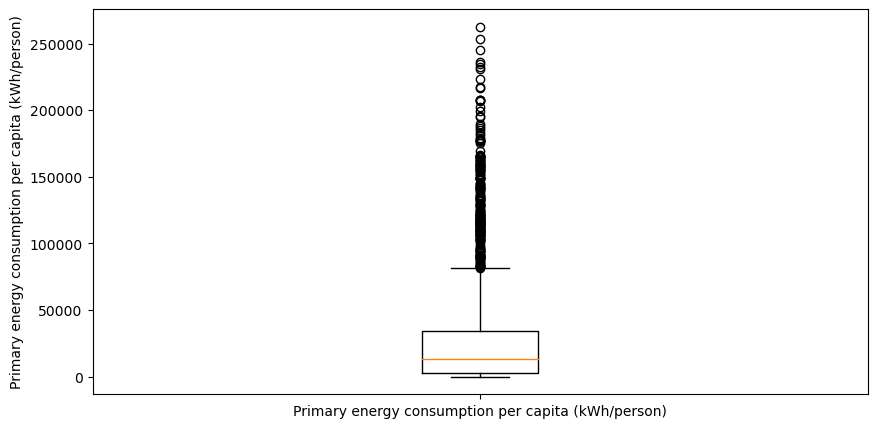

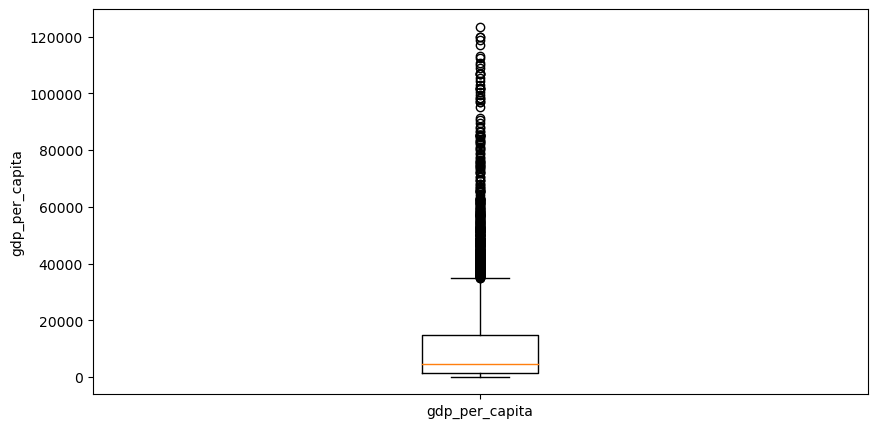

In [17]:
# Box plot for CO2 emissions
plt.figure(figsize=(10, 5)) #create size of plot
plt.boxplot(df['CO2 Emissions (metric tons per capita)']) #use data from this column in dataframe
plt.ylabel('CO2 Emissions (metric tons per capita)')#label the y axis
plt.xticks([1], ['CO2 Emissions']) #label the x axis
plt.show() #plot the graph

# Box plot for Electricity from fossil fuels
plt.figure(figsize=(10, 5))
plt.boxplot(df['Electricity from fossil fuels (TWh)'])
plt.ylabel('Electricity from fossil fuels (TWh)')
plt.xticks([1], ['Electricity from fossil fuels (TWh)'])
plt.show()

# Box plot for Renewable-electricity-generating-capacity-per-capita
plt.figure(figsize=(10, 5))
plt.boxplot(df['Renewable-electricity-generating-capacity-per-capita'])
plt.ylabel('Renewable-electricity-generating-capacity-per-capita')
plt.xticks([1], ['Renewable-electricity-generating-capacity-per-capita'])
plt.show()

# Box plot for Primary energy consumption per capita (kWh/person)
plt.figure(figsize=(10, 5))
plt.boxplot(df['Primary energy consumption per capita (kWh/person)'])
plt.ylabel('Primary energy consumption per capita (kWh/person)')
plt.xticks([1], ['Primary energy consumption per capita (kWh/person)'])
plt.show()

# Box plot for gdp_per_capita
plt.figure(figsize=(10, 5))
plt.boxplot(df['gdp_per_capita'])
plt.ylabel('gdp_per_capita')
plt.xticks([1], ['gdp_per_capita'])
plt.show()


There are multiple outliers which show that some countries have much higher values. This could be important so may not want to remove outliers. 

#### Data visualisation

In [18]:
# Calculate mean CO2 emissions by year
mean_yr = df.groupby('Year')['CO2 Emissions (metric tons per capita)'].mean() #group the CO2 columun data by year and calculate the mean for each year
mean_yr = mean_yr.reset_index()

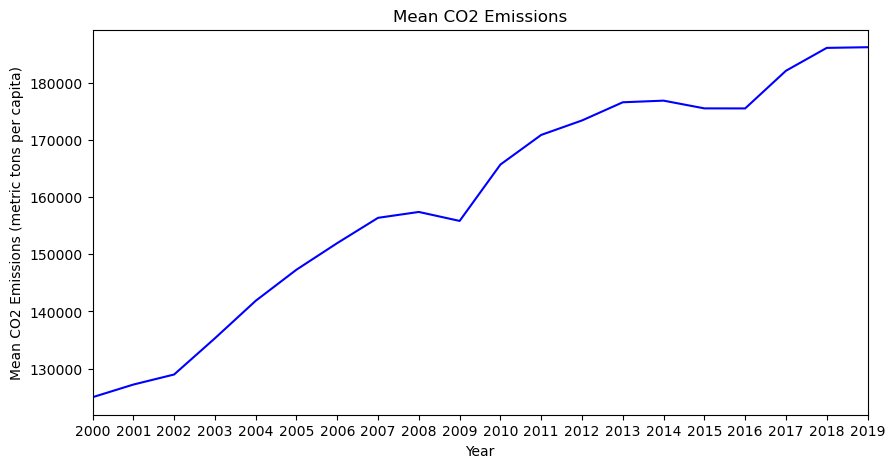

In [19]:
#Plot line graph of mean CO2 emissions 
plt.figure(figsize = (10,5))
sns.lineplot(data = mean_yr, x = 'Year', y = 'CO2 Emissions (metric tons per capita)', color = 'blue') #plot
plt.title('Mean CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('Mean CO2 Emissions (metric tons per capita)')

plt.xticks(mean_yr['Year'], rotation = 0, ha = 'center')
plt.xlim(2000, 2019) 

plt.show()

Global CO2 emissions have been increasing since 2000.

#### CO2 Emissions by country

In [20]:
import plotly.express as px

# Calculate the  mean 'CO2' emissions for each 'Country' and plot the top 10
mean_CO2 = df.groupby('Country')['CO2 Emissions (metric tons per capita)'].mean().reset_index()

# Create a choropleth map
fig = px.choropleth(mean_CO2, #use this data
                    locations='Country', 
                    locationmode='country names',
                    color='CO2 Emissions (metric tons per capita)', #colour based on the emissions column value
                    hover_name='Country', #show the country name when mouse goes over
                    title='Mean CO2 Emissions per Country',
                    color_continuous_scale=px.colors.sequential.Plasma) #choose colour for scale
fig.update_layout(
    autosize=False,
    width=900,
    height=500,
)
fig.show()

In [21]:
# Calculate the  mean Primary energy consumption for each Country and plot the top 10
mean_energy = df.groupby('Country')['Primary energy consumption per capita (kWh/person)'].mean().reset_index()

# Create a choropleth map
fig = px.choropleth(mean_energy, 
                    locations='Country', 
                    locationmode='country names',
                    color='Primary energy consumption per capita (kWh/person)',
                    hover_name='Country', 
                    title='Mean primary energy consumption per capita (kWh/person)',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
)
fig.show()

In [22]:
# Calculate the mean Low-carbon electricity for each Country and plot the top 10
mean_lowCarbon = df.groupby('Country')['Low-carbon electricity (% electricity)'].mean().reset_index()

# Create a choropleth map
fig = px.choropleth(mean_lowCarbon, 
                    locations='Country', 
                    locationmode='country names',
                    color='Low-carbon electricity (% electricity)',
                    hover_name='Country', 
                    title='Mean low-carbon electricity (% electricity)',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    autosize=False,
    width=900,
    height=500,
)
fig.show()

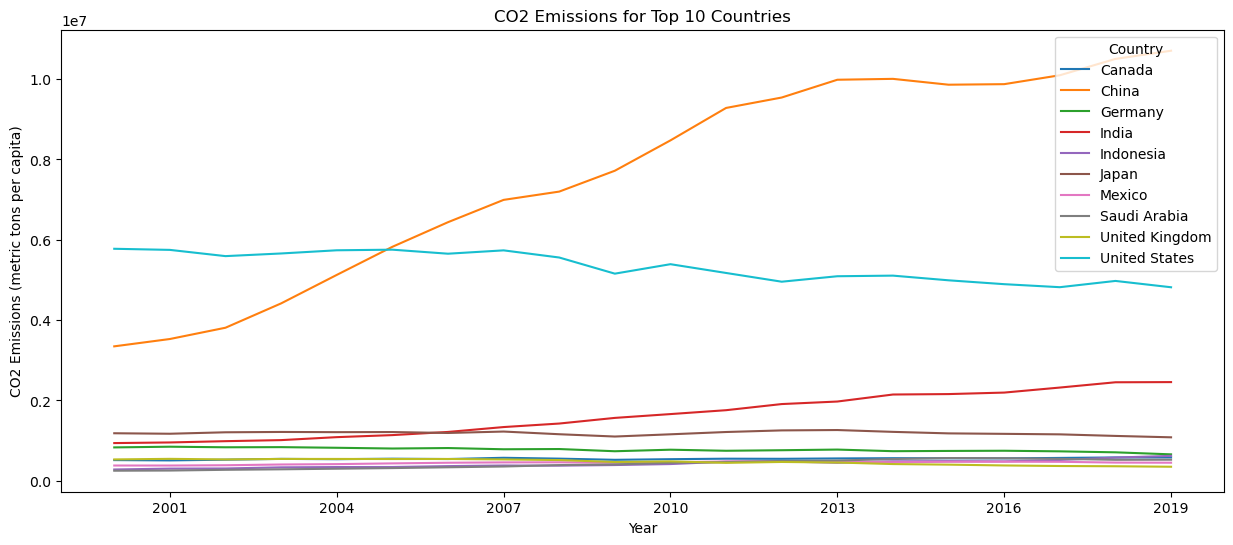

In [23]:
# Identify the top 10 countries with the highest mean CO2 emissions
top_countries = df.groupby('Country')['CO2 Emissions (metric tons per capita)'].mean().nlargest(10).index

# Filter the DataFrame to include only the top 10 countries
df_top_countries = df[df['Country'].isin(top_countries)]

# Create a line plot for each country
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_top_countries, x='Year', y='CO2 Emissions (metric tons per capita)', hue='Country')
ax = plt.gca() # Get current axes
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True)) # Set x-ticks to be integers
plt.title('CO2 Emissions for Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (metric tons per capita)')
plt.show()


China seems to be increasing at steady rate since 2002, whereas USA seems to be declining at a slow rate. The UK also has a slight decline. India has started to increase since 2007 but not as dramatically as China. Japan and Germany appear to be remaining constant. 

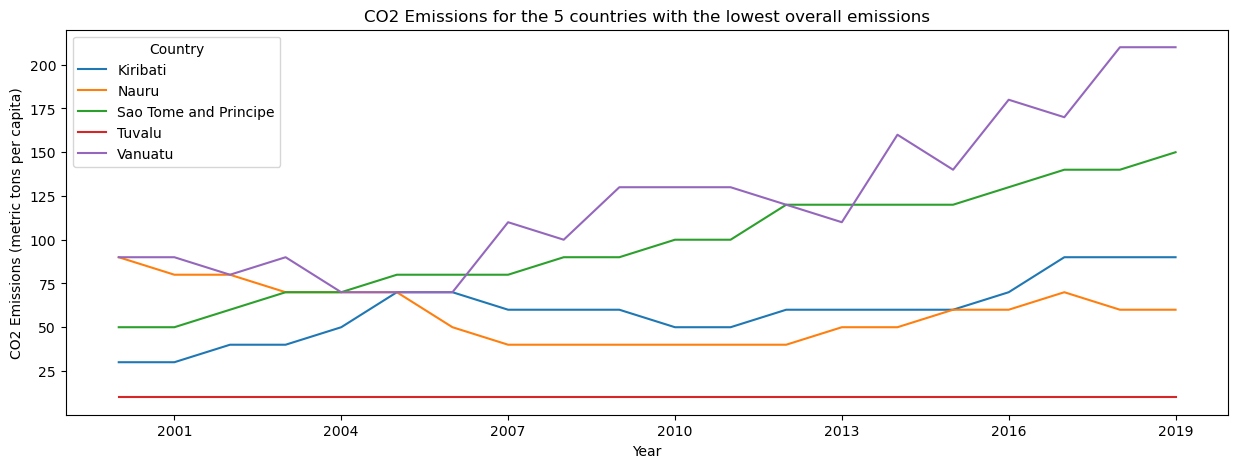

In [24]:
# Identify the 5 countries with the lowest mean CO2 emissions
top_countries = df.groupby('Country')['CO2 Emissions (metric tons per capita)'].mean().nsmallest(5).index

# Filter the DataFrame to include only the lowest 5
df_top_countries = df[df['Country'].isin(top_countries)]

# Create a line plot for each country
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_top_countries, x='Year', y='CO2 Emissions (metric tons per capita)', hue='Country')
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))# Set x-ticks to be integers
plt.title('CO2 Emissions for the 5 countries with the lowest overall emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (metric tons per capita)')
plt.show()

There is a lot more variation in CO2 emissions over the years in these countries. Vanuatu and Sao Tome and Principe seems to be increasing.

In [25]:
# Calculate the  mean 'CO2' emissions for each 'Country' and plot the top 10
mean_CO2 = df.groupby('Country')['CO2 Emissions (metric tons per capita)'].mean().reset_index()
mean_CO2 = mean_CO2.sort_values(by='CO2 Emissions (metric tons per capita)', ascending=False)

# Select the top 10 countries with the highest mean CO2 emissions
top_10_mean_CO2 = mean_CO2.head(10)

# Create a bar plot
fig = px.bar(
    top_10_mean_CO2,
    x='Country',  
    y='CO2 Emissions (metric tons per capita)',  
    color='CO2 Emissions (metric tons per capita)',  
    title='Mean CO2 Emissions of the top 10 countries', 
    labels={'Country': 'Country', 'CO2 Emissions (metric tons per capita)': 'CO2 Emissions'},  
    template='plotly_white'  
)

# Display the plot
fig.show()

China and the United States produce the highest amounts of CO2

In [26]:
# Calculate the  mean 'CO2' emissions for each 'Country' and plot the 10 countries with lowest CO2 emissions
mean_CO2 = df.groupby('Country')['CO2 Emissions (metric tons per capita)'].mean().reset_index()
mean_CO2 = mean_CO2.sort_values(by='CO2 Emissions (metric tons per capita)', ascending=True)

# Select the 10 countries with the lowest mean CO2 emissions
top_10_mean_CO2 = mean_CO2.head(10)

# Create a bar plot
fig = px.bar(
    top_10_mean_CO2,
    x='Country',  
    y='CO2 Emissions (metric tons per capita)',  
    color='CO2 Emissions (metric tons per capita)',  
    title='Lowest mean CO2 Emissions of the countries', 
    labels={'Country': 'Country', 'CO2 Emissions (metric tons per capita)': 'CO2 Emissions'},  
    template='plotly_white'  
)

# Display the plot
fig.show()

There are a few countries that have significantly higher CO2 emissions compared to the rest of the world, China, United States and India. 

##### Land area of countries and CO2 Emissions

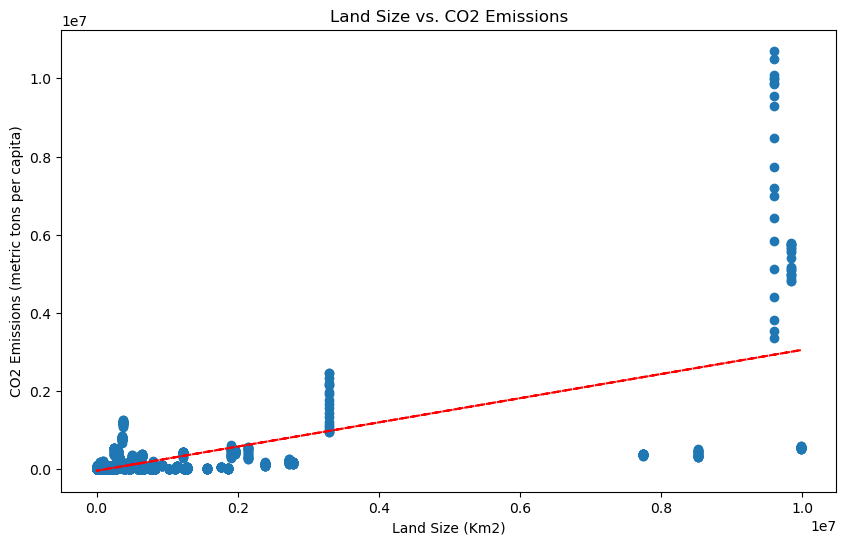

In [27]:
#Create scatterplot to look at land size and CO2 emissions
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x =  df['Land Area(Km2)'], y = df['CO2 Emissions (metric tons per capita)'])

# Calculate the trend line
z = np.polyfit(df['Land Area(Km2)'], df['CO2 Emissions (metric tons per capita)'], 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(df['Land Area(Km2)'], p(df['Land Area(Km2)']), "r--")


plt.title('Land Size vs. CO2 Emissions')
plt.xlabel('Land Size (Km2)')
plt.ylabel('CO2 Emissions (metric tons per capita)')
plt.show()

There is a positive correlation between land size and CO2 emissions. Indicating that as land size increases the CO2 emissions tend to increase. There is a cluster of points at the lower axes that suggests that smaller land sizes are associated with lower emissions with some outliers where there are higher emissions for larger land sizes.

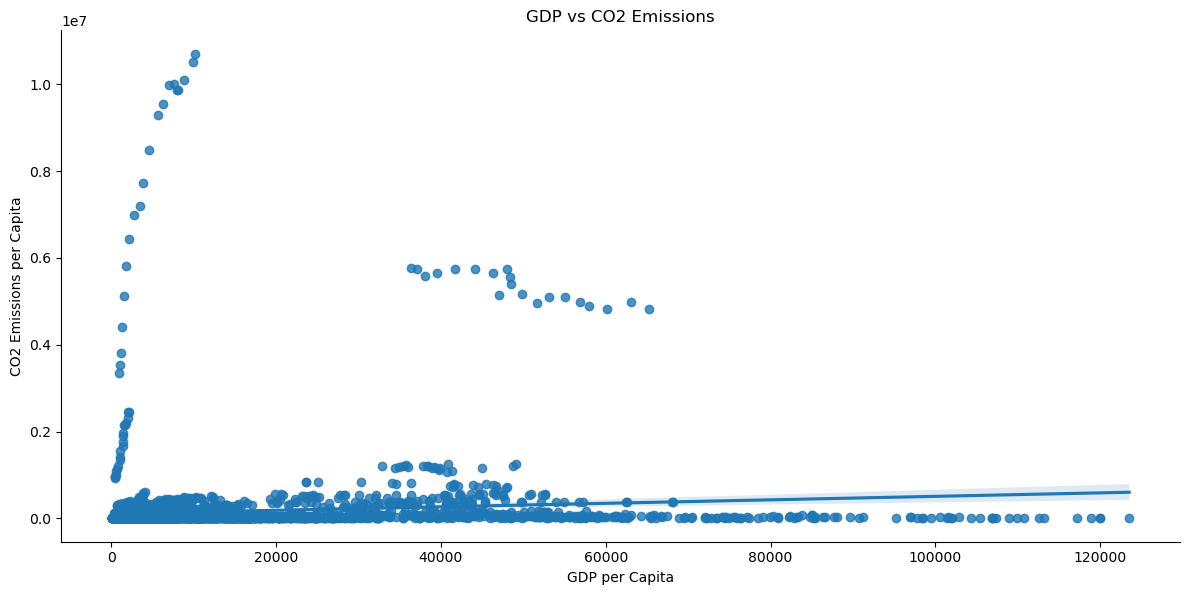

In [28]:
# Create scatterplot of'GDP per capita' and 'CO2 emissions per capita'
sns.lmplot(x='gdp_per_capita' , y='CO2 Emissions (metric tons per capita)', data=df, aspect=2, height=6)
plt.title('GDP vs CO2 Emissions')
plt.xlabel('GDP per Capita')
plt.ylabel('CO2 Emissions per Capita')
plt.show()

There is a large number of data points clustered at the lower end of GDP, which indicates that countries with lower GDP have lower CO2 emissions. However, there are some outliers. There does not appear to be a clear trend for the amount of CO2 emissions and increase in GDP, which suggests that there are other factors that influence emissions. 

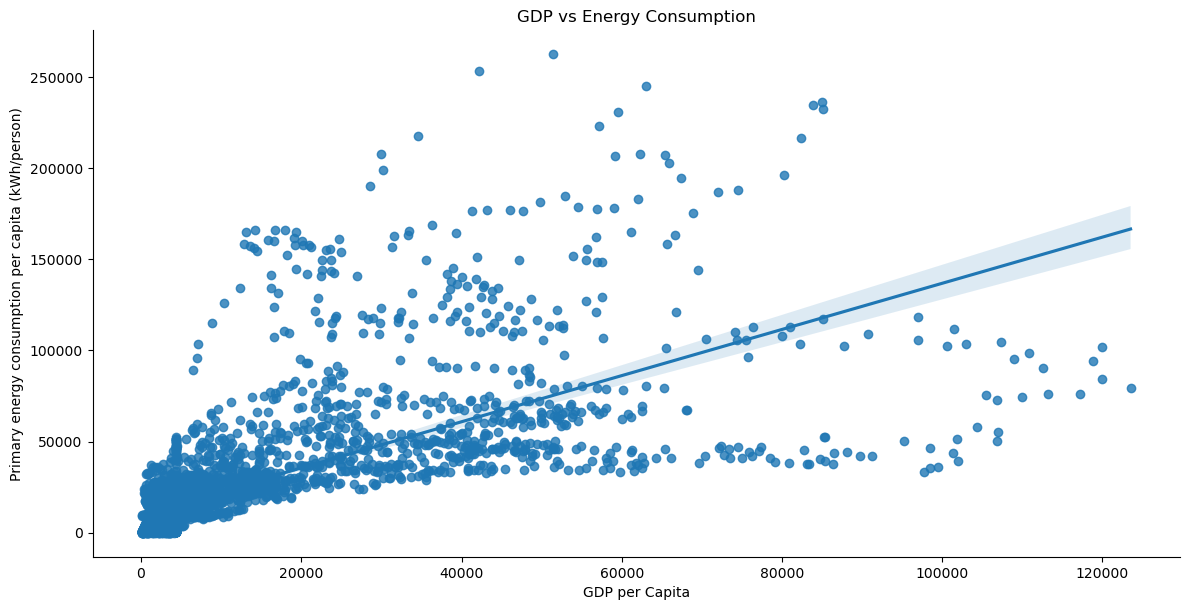

In [29]:
# Create scatterplot of'GDP per capita' and 'CO2 emissions per capita'
sns.lmplot(x='gdp_per_capita' , y='Primary energy consumption per capita (kWh/person)', data=df, aspect=2, height=6)
plt.title('GDP vs Energy Consumption')
plt.xlabel('GDP per Capita')
plt.ylabel('Primary energy consumption per capita (kWh/person)')
plt.show()

There seems to be a positive trend where the higher the GDP per capita the higher the energy consumption

#### Energy sources for electricity generation

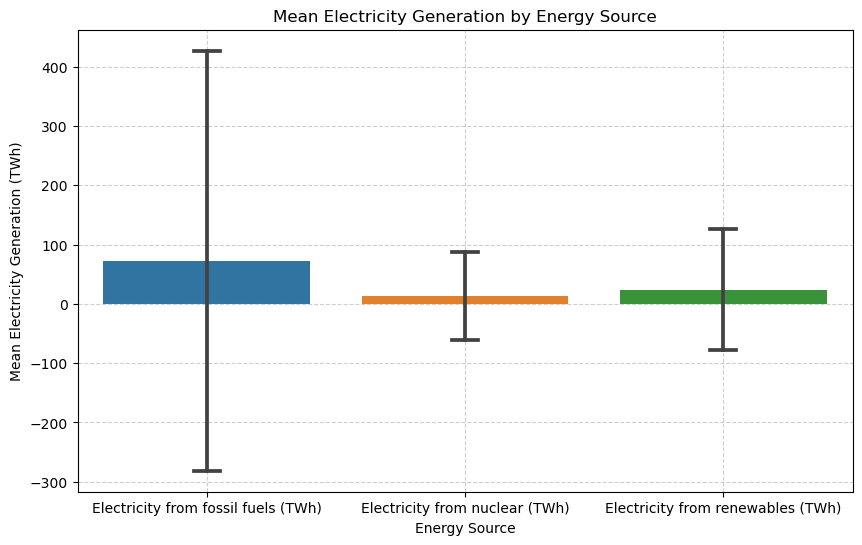

In [30]:
# List of energy sources
energy_sources = ['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']

# Melt the DataFrame to make it suitable for seaborn
df_melted = df[energy_sources].melt(var_name='Energy Source', value_name='Mean Electricity Generation')

# Create the figure 
fig, ax = plt.subplots(figsize =(10,6))

# Plot means with error bars
sns.barplot(x='Energy Source', y='Mean Electricity Generation', data=df_melted, ci='sd', capsize=0.1, ax=ax)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.6)

# Set the title and labels
ax.set_title('Mean Electricity Generation by Energy Source')
ax.set_xlabel('Energy Source')
ax.set_ylabel('Mean Electricity Generation (TWh)')

# Show the plot
plt.show()

Electricity is mainly generated by fossil fuels but that varies quite a bit across the countries. 

#### Energy source for electricity generation for top 10 countries

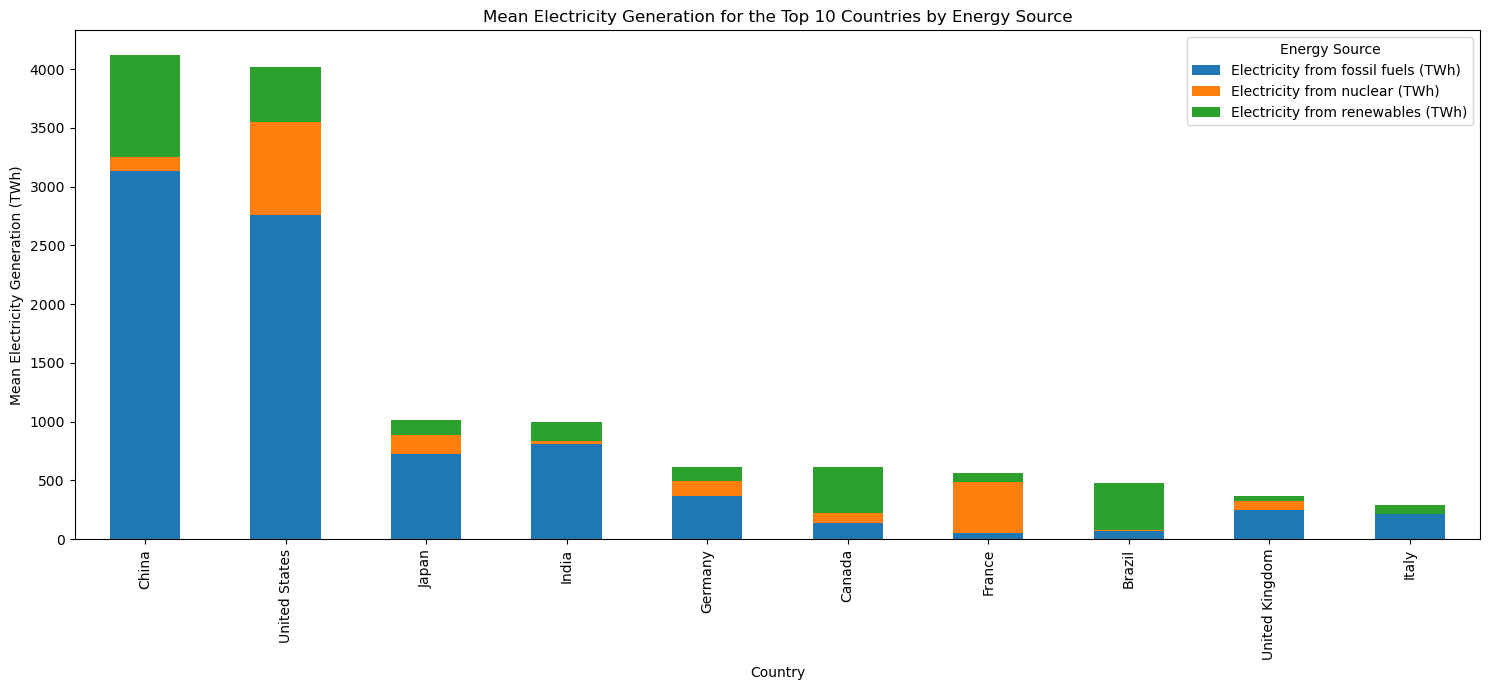

In [31]:
# Group data by 'Country' and calculate the mean electricity generation for each energy source for the top 10 countries
country_energy = df.groupby('Country')[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']].mean()

# Sort countries based on the mean electricity generation and select the top 10
country_energy['Mean Generation (TWh)'] = country_energy.mean(axis=1)
top_countries = country_energy.sort_values('Mean Generation (TWh)', ascending=False).head(10)

# Plot bar chart for the top 10 countries
top_countries[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']].plot(kind='bar', stacked=True, figsize=(15, 7))

plt.title('Mean Electricity Generation for the Top 10 Countries by Energy Source')
plt.xlabel('Country')
plt.ylabel('Mean Electricity Generation (TWh)')
plt.legend(title='Energy Source')
plt.tight_layout()
plt.show()

Most of the electricity is generated by fossil fuels as the primary energy source. However, in Canada and Brazil they generate most of theirs from renewable energy and France mostly from nuclear energy. 

#### Energy source for electricity generation for bottom 10 countries

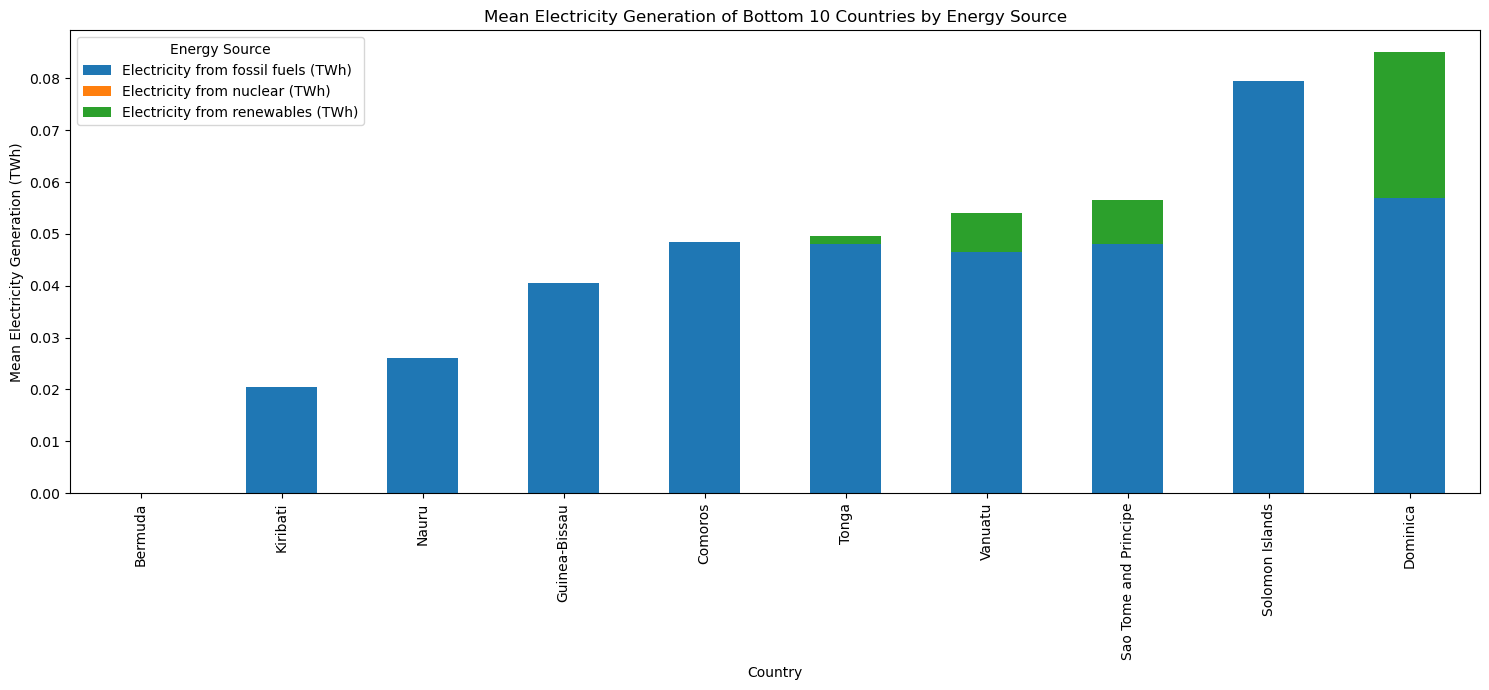

In [32]:
# Group by 'Country' and calculate the mean electricity generation for each energy source
country_energy = df.groupby('Country')[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']].mean()

# Sort countries based on the mean electricity generation and select the bottom 10
country_energy['Mean Generation (TWh)'] = country_energy.mean(axis=1)
bottom_countries = country_energy.sort_values('Mean Generation (TWh)', ascending=True).head(10)

# Plot bar chart for the bottom 10 countries
bottom_countries[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']].plot(kind='bar', stacked=True, figsize=(15, 7))

plt.title('Mean Electricity Generation of Bottom 10 Countries by Energy Source')
plt.xlabel('Country')
plt.ylabel('Mean Electricity Generation (TWh)')
plt.legend(title='Energy Source')
plt.tight_layout()
plt.show()

Most of the electricity is generated by fossil fuels in these countries

#### Changes to energy generation sources over time

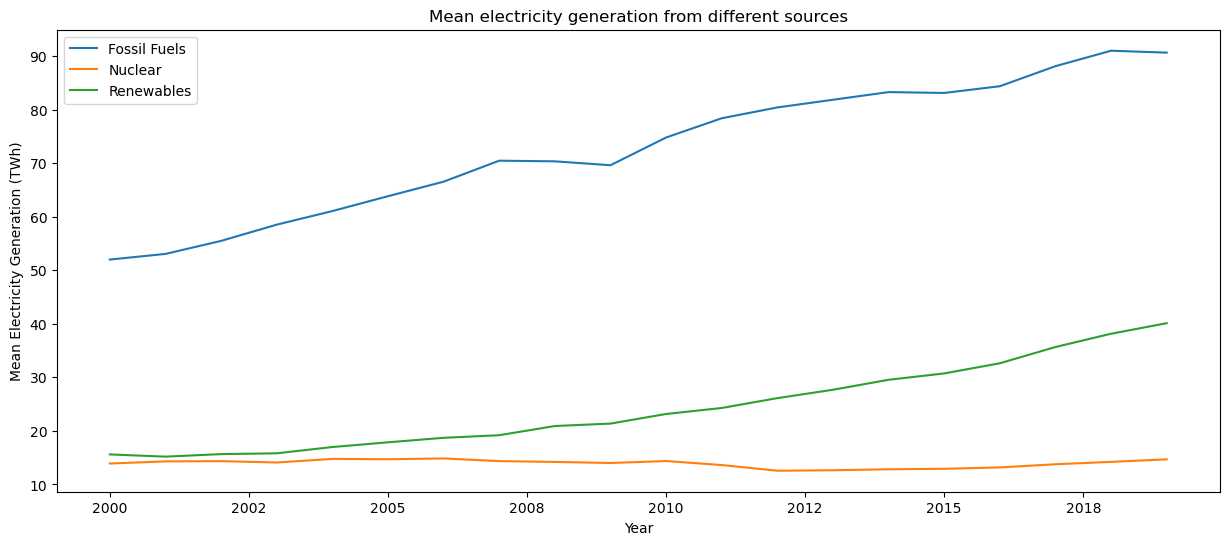

In [33]:
# Convert 'Year' to numeric, coercing non-numeric values to NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop rows with NaN 'Year' values
df = df.dropna(subset=['Year'])

# Group by 'Year' and calculate the mean
df_mean = df.groupby('Year')[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']].mean()

fig, ax = plt.subplots(figsize=(15, 6)) #plot size

# Plot each energy source
ax.plot(df_mean.index, df_mean['Electricity from fossil fuels (TWh)'], label='Fossil Fuels') #plot the mean of this data column and label 
ax.plot(df_mean.index, df_mean['Electricity from nuclear (TWh)'], label='Nuclear')
ax.plot(df_mean.index, df_mean['Electricity from renewables (TWh)'], label='Renewables')

# Add legend, title and labels
ax.legend(loc='upper left')
plt.title('Mean electricity generation from different sources')
plt.xlabel('Year')
plt.ylabel('Mean Electricity Generation (TWh)')
ax.xaxis.set_major_formatter('{x:.0f}')#display year with 0 decimal places

plt.show()

Electricity generated by fossil fuels has been increasing since 2000. Renewables has had a sharp increase since about 2008. Nuclear power has not really changed, a small decrease from 2010 and slight increase again from 2017.

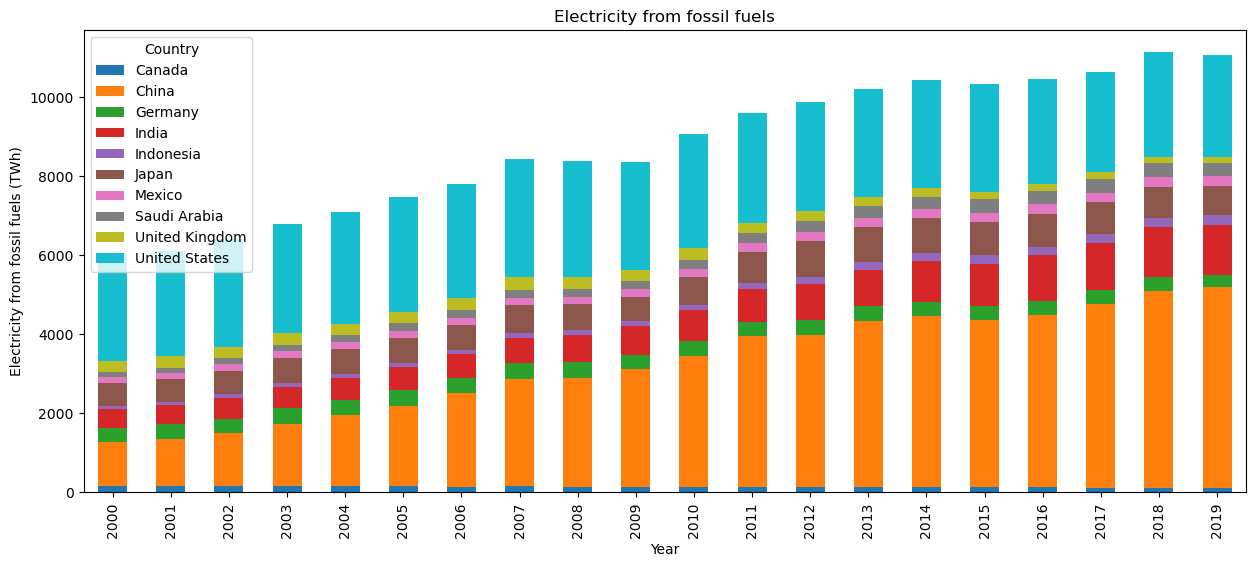

In [34]:
# Identify the top 10 countries with the highest mean CO2 emissions
top_countries = df.groupby('Country')['CO2 Emissions (metric tons per capita)'].mean().nlargest(10).index

# Filter the DataFrame to include only the top 10 countries
df_top_countries = df[df['Country'].isin(top_countries)]

# Pivot the DataFrame to get years as index and countries as columns, with energy consumption as values
df_fossil = df_top_countries.pivot(index='Year', columns='Country', values='Electricity from fossil fuels (TWh)')

# Create a stacked bar plot
plt.figure(figsize=(15, 6))
df_fossil.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Electricity from fossil fuels')
plt.xlabel('Year')
plt.ylabel('Electricity from fossil fuels (TWh)')
plt.show()

There is an overall increase over time of the use of fossil fuels across these countries. China shows a steady increase. UK, Canada and Germany show a slight decrease. Indonesia and Saudi Arabia show a slight increase. Japan, Mexico and USA appear to remain relatively the same with some small fluctuations.

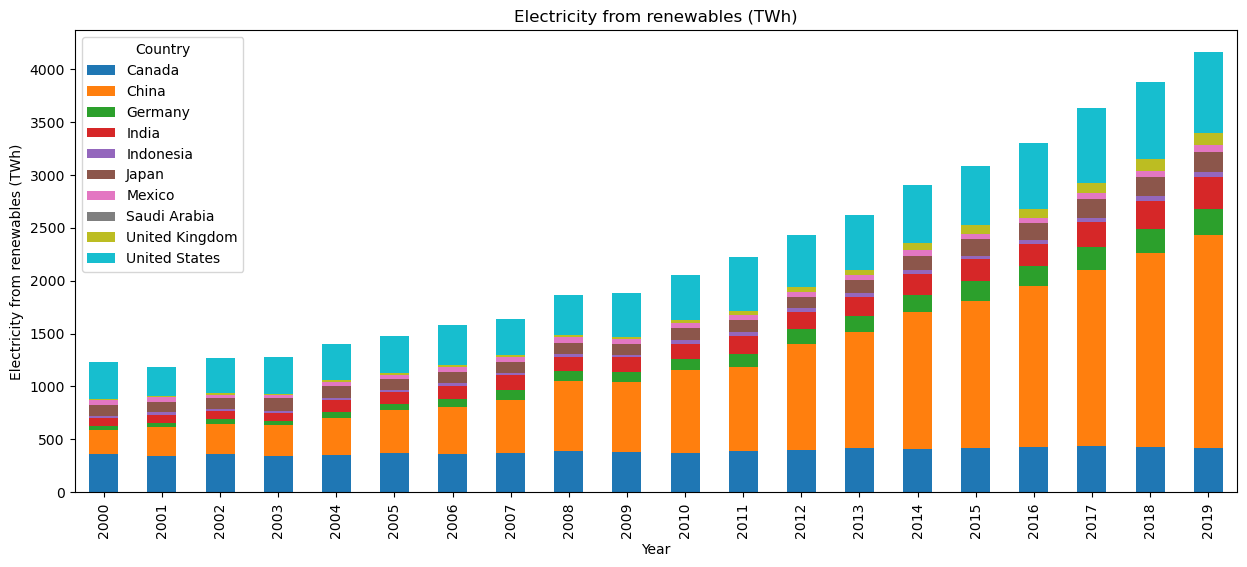

In [35]:
# Identify the top 10 countries with the highest mean CO2 emissions
top_countries = df.groupby('Country')['CO2 Emissions (metric tons per capita)'].mean().nlargest(10).index

# Filter the DataFrame to include only the top 10 countries
df_top_countries = df[df['Country'].isin(top_countries)]

# Pivot the DataFrame to get years as index and countries as columns, with energy consumption as values
df_renewable = df_top_countries.pivot(index='Year', columns='Country', values='Electricity from renewables (TWh)')

# Create a stacked bar plot
plt.figure(figsize=(15, 6))
df_renewable.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Electricity from renewables (TWh)')
plt.xlabel('Year')
plt.ylabel('Electricity from renewables (TWh)')
plt.show()


There is an overall increase use of renewables to generate electricity. China, USA, India, Germany, Japan, UK have all increased their use of renewables although at varying degrees, with China and USA showing significant growth in renewable electricity generation. Mexico, Indonesia have not really increased by much over the years. 

### Correlation analysis

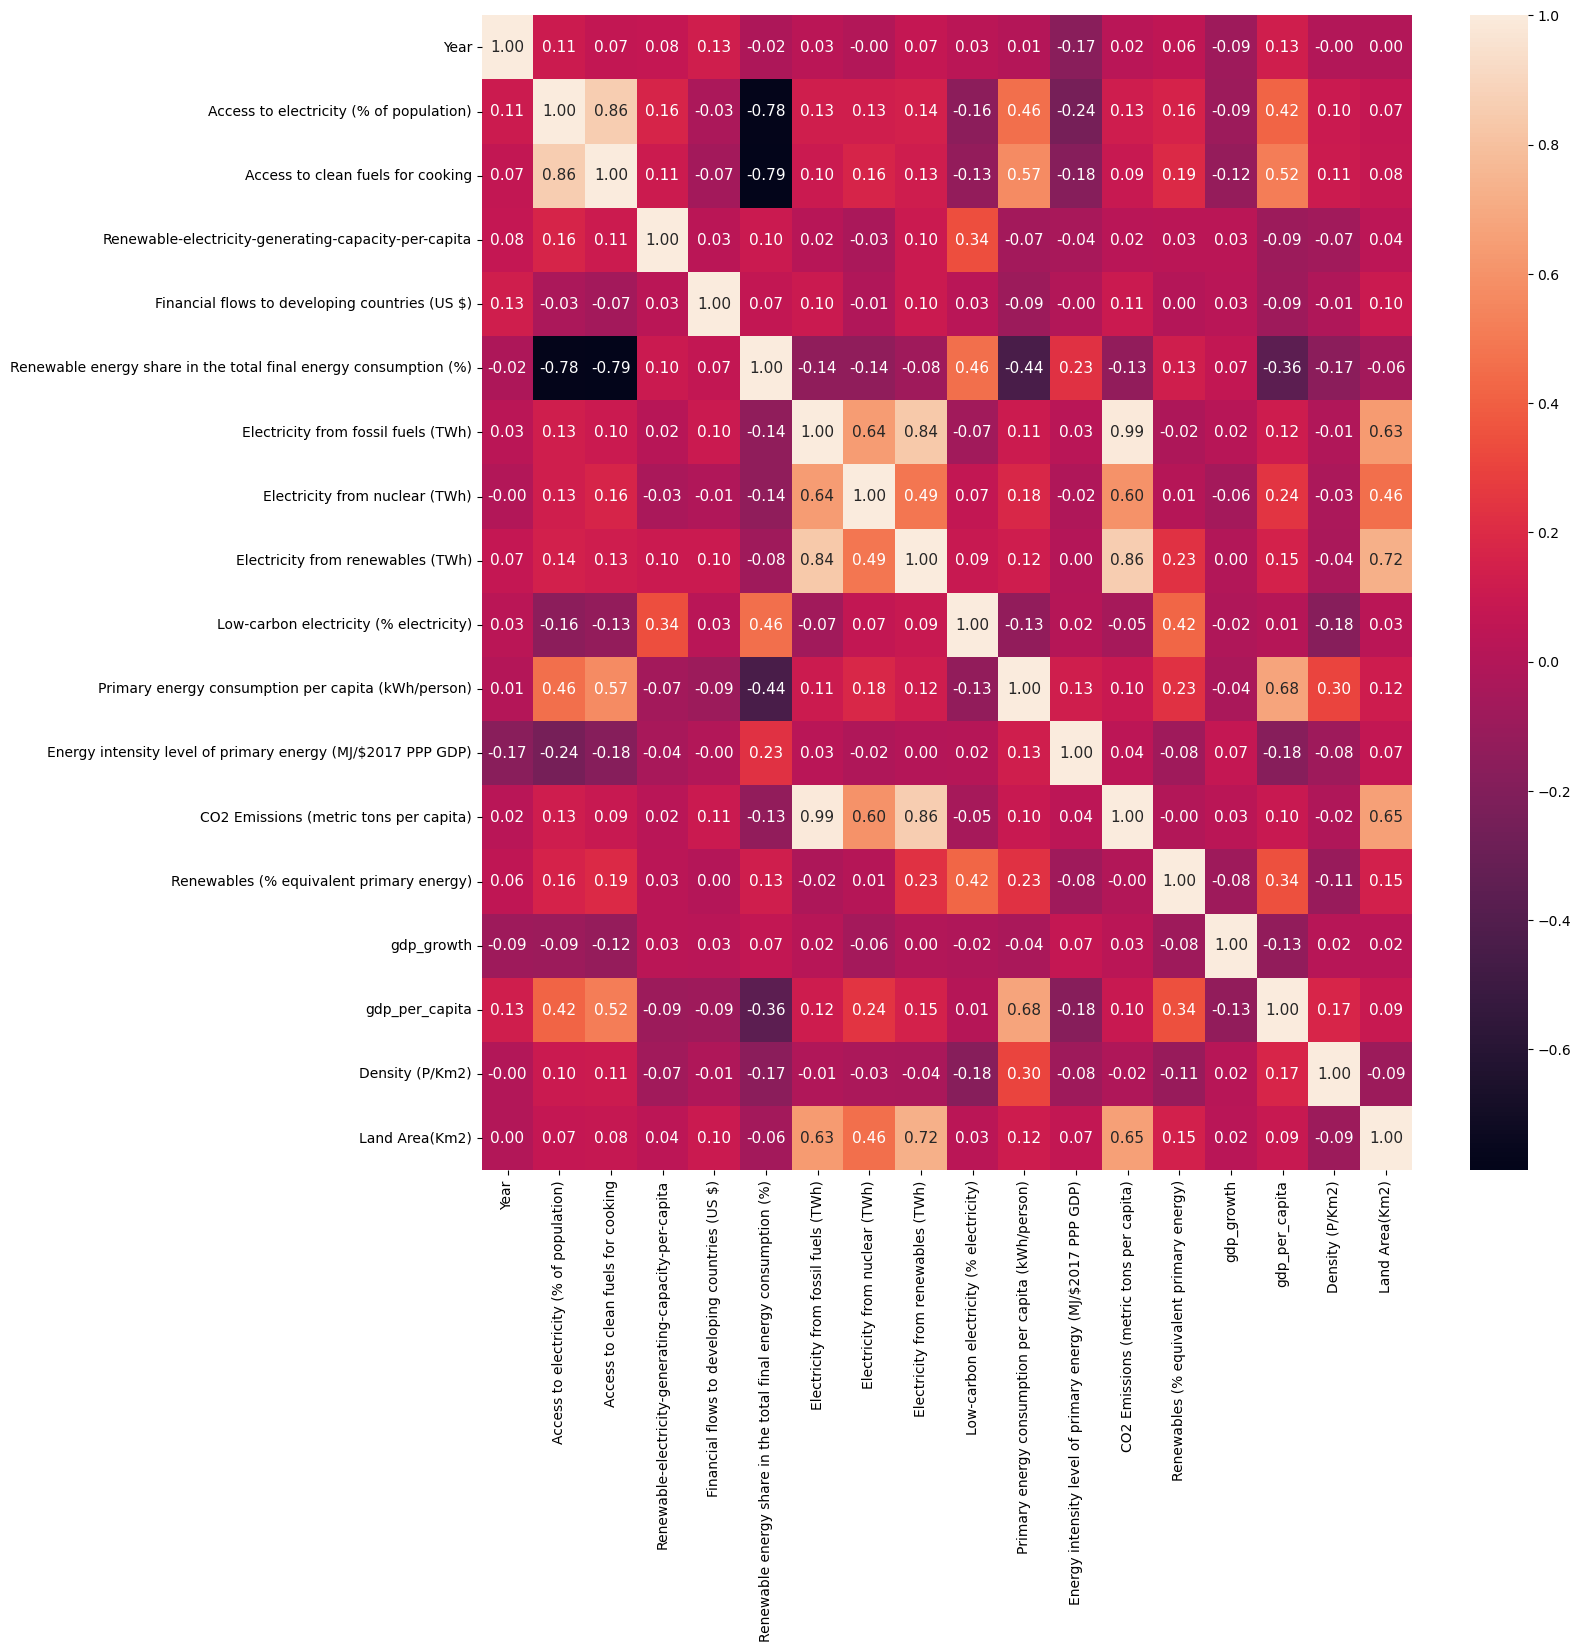

In [36]:
# Select only numeric columns
df_num = df.select_dtypes(include=[np.number])

corr_matrix=df_num.corr() #calculate correlation matrix for numeric variables
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", annot_kws={"size": 11}) #create heat map
plt.show()

Access to clean fuels and access to electricity are highly correlated so suggest removing one for the model. These are both highly negatively correlated with renewable energy share as well. So perhaps keep energy share and remove access to clean fuels and electricity. Primary energy consumption and gdp per capita are highly correlated so remove gdp per capita. May be remove density. Electricity from nuclear and renewables are highly correlated with electricity from fossil fuels, so remove those and keep fossil fuels as that's more relevant to CO2 emissions. Variables that are highly correlated with the target variable (CO2 emissions) include: Land area, Electricity from renewables, Electricity from nuclear, Electricity from fossil fuels. 

### Data pre-processing

#### Subset data

In [37]:
# Select relevant columns to keep
features_keep = [
    "Renewable-electricity-generating-capacity-per-capita",
    "Low-carbon electricity (% electricity)",
    "Primary energy consumption per capita (kWh/person)",
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)",
    "CO2 Emissions (metric tons per capita)",
    "Renewables (% equivalent primary energy)", 
    'Access to electricity (% of population)',
    "Year", 'gdp_growth', 'Land Area(Km2)',
    'Density (P/Km2)', 'Electricity from fossil fuels (TWh)',
   
]

# Create a new DataFrame with just these variables
df = df[features_keep]

In [38]:
df.describe()

Renewable-electricity-generating-capacity-per-capita  \
count                                        3221.000000      
mean                                           88.630182      
std                                           210.855602      
min                                             0.000000      
25%                                             8.460000      
50%                                            30.115000      
75%                                            65.610000      
max                                          3060.190000      

       Low-carbon electricity (% electricity)  \
count                             3221.000000   
mean                                37.531706   
std                                 34.133361   
min                                  0.000000   
25%                                  4.505698   
50%                                 30.187931   
75%                                 64.285710   
max                                100.000010   

       Primary energy consumption per capita (kWh/person)  \
count                                        3221.000000    
mean                                        26433.841959    
std                                         35936.269051    
min                                             0.000000    
25%                                          2951.367200    
50%                                         13342.630000    
75%                                         34507.516000    
max                                        262585.700000    

       Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
count                                        3221.000000             
mean                                            5.453983             
std                                             3.578254             
min                                             1.030000             
25%                                             3.300000             
50%                                             4.450000             
75%                                             6.160000             
max                                            32.570000             

       CO2 Emissions (metric tons per capita)  \
count                            3.221000e+03   
mean                             1.598665e+05   
std                              7.736611e+05   
min                              1.000000e+01   
25%                              2.020000e+03   
50%                              1.050000e+04   
75%                              6.058000e+04   
max                              1.070722e+07   

       Renewables (% equivalent primary energy)  \
count                               3221.000000   
mean                                   8.523949   
std                                   10.360430   
min                                    0.000000   
25%                                    5.970023   
50%                                    5.970023   
75%                                    5.970023   
max                                   83.540470   

       Access to electricity (% of population)         Year   gdp_growth  \
count                              3221.000000  3221.000000  3221.000000   
mean                                 78.064125  2009.510711     3.859563   
std                                  30.935466     5.751880     5.230559   
min                                   1.252269  2000.000000   -62.075920   
25%                                  56.900000  2005.000000     1.800226   
50%                                  97.900000  2010.000000     3.789156   
75%                                 100.000000  2014.000000     5.896232   
max                                 100.000000  2019.000000   123.139555   

       Land Area(Km2)  Density (P/Km2)  Electricity from fossil fuels (TWh)  
count    3.221000e+03      3221.000000                          3221.000000  
mean     6.521633e+05       227.492704                            72.8512

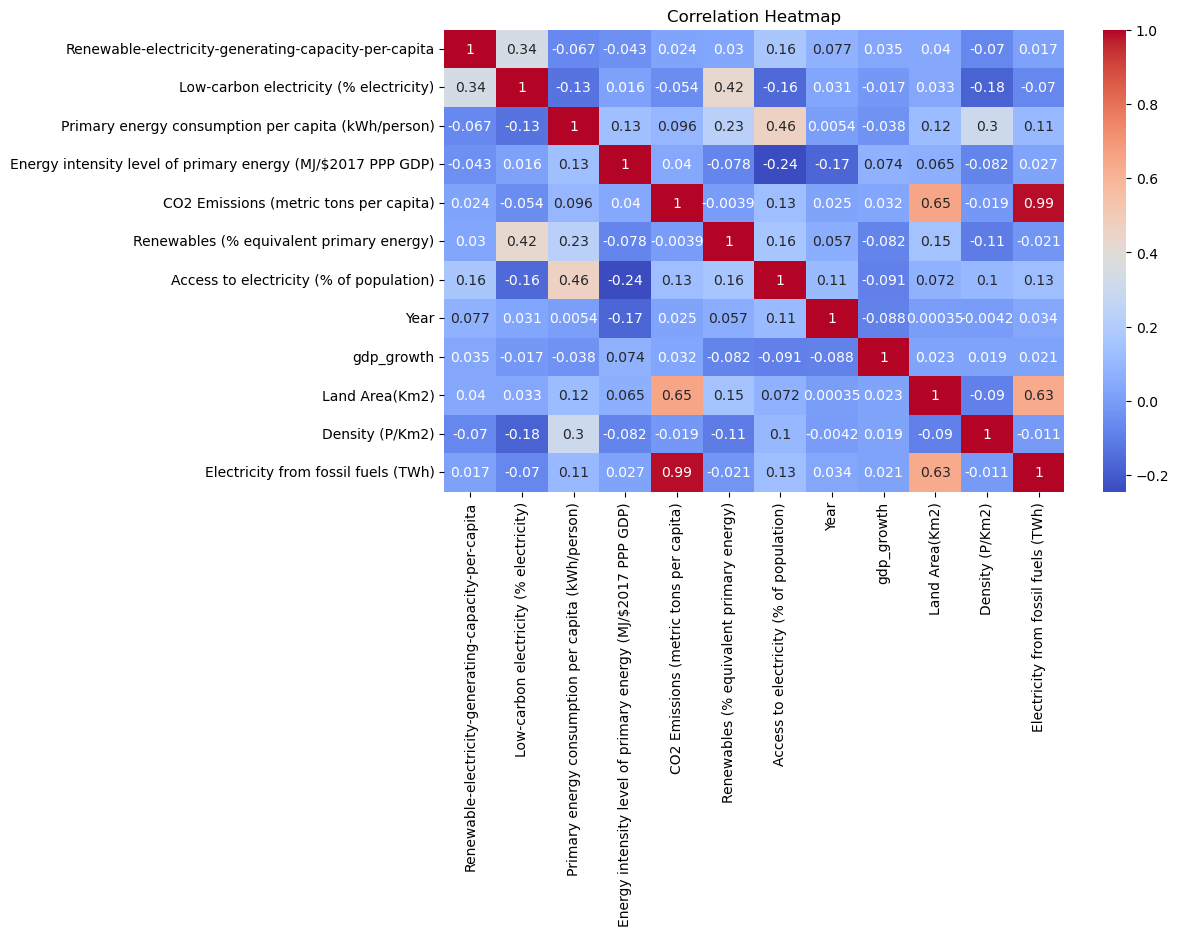

In [39]:
#Check correlations with selected features
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Feature scaling

In [40]:
#scale all numerical values
from sklearn.preprocessing import MinMaxScaler

#Initialise scaler
scaler = MinMaxScaler() #scales data between range 0-1

# create copy of the dataframe
df_scaled = df.copy()

#select numerical columns to be scaled from dataframe
num_cols = df_scaled.select_dtypes(include=[np.number]).columns.tolist()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols]) #scales selected columns and transforms data

# Display the scaled DataFrame
df_scaled.head()

Renewable-electricity-generating-capacity-per-capita  \
0                                           0.003013      
1                                           0.002895      
2                                           0.002768      
3                                           0.002644      
4                                           0.002533      

   Low-carbon electricity (% electricity)  \
0                                0.659574   
1                                0.847458   
2                                0.811594   
3                                0.670213   
4                                0.629213   

   Primary energy consumption per capita (kWh/person)  \
0                                           0.001152    
1                                           0.000902    
2                                           0.000803    
3                                           0.000876    
4                                           0.000778    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                           0.019341             
1                                           0.022511             
2                                           0.011731             
3                                           0.011731             
4                                           0.005390             

   CO2 Emissions (metric tons per capita)  \
0                                0.000070   
1                                0.000067   
2                                0.000095   
3                                0.000113   
4                                0.000095   

   Renewables (% equivalent primary energy)  \
0                                  0.071463   
1                                  0.071463   
2                                  0.071463   
3                                  0.071463   
4                                  0.071463   

   Access to electricity (% of population)      Year  gdp_growth  \
0                                 0.003659  0.000000    0.355613   
1                                 0.028581  0.052632    0.355613   
2                                 0.082603  0.105263    0.355613   
3                                 0.136573  0.157895    0.382842   
4                                 0.190513  0.210526    0.342790   

   Land Area(Km2)  Density (P/Km2)  Electricity from fossil fuels (TWh)  
0        0.065321         0.006941                             0.000031  
1        0.065321         0.006941                             0.000018  
2        0.065321         0.006941                             0.000025  
3        0.065321         0.006941                             0.000061  
4        0.065321         0.006941                             0.000065

### Model Building

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [42]:
#Use scaled features and split into the target and features
target = df_scaled['CO2 Emissions (metric tons per capita)']
features =  df_scaled.drop(['CO2 Emissions (metric tons per capita)'], axis=1)
   
#Split the dataset into feature and target variables
X = features
y = target

#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # 20% test, random state 42 keeps same data each time you run

In [43]:
# Initialize and train Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)#100 trees, keep same data for split
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [44]:
# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [45]:
# Make predictions using test data
rf_predict = rf_model.predict(X_test)
lr_predict= lr_model.predict(X_test)

### Model evaluation

In [46]:
#Calculate evaluation metrics
rf_mse = mean_squared_error(y_test, rf_predict)
rf_rmse = mean_squared_error(y_test, rf_predict, squared=False) 
rf_mae = mean_absolute_error(y_test, rf_predict)
rf_r2 = r2_score(y_test, rf_predict)

lr_mse = mean_squared_error(y_test, lr_predict)
lr_rmse = mean_squared_error(y_test, lr_predict, squared=False)  
lr_mae = mean_absolute_error(y_test, lr_predict)
lr_r2 = r2_score(y_test, lr_predict)

#Create table showing model evaluation metrics
eval = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression'],
    'MSE': [rf_mse, lr_mse],
    'RMSE': [rf_mse, lr_rmse],
    'MAE': [rf_mae, lr_mae],
    'R-squared': [rf_r2, lr_r2]
})

print(eval)

               Model       MSE      RMSE       MAE  R-squared
0      Random Forest  0.000004  0.000004  0.000462   0.999085
1  Linear Regression  0.000074  0.008628  0.002930   0.982164


##### Repeated K-Fold Cross Validation

In [47]:
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from numpy import mean, std, sqrt
from sklearn.model_selection import cross_val_score


#Random Forest model evaluation using repeated K-fold cross validation to account for overfitting


# Define the cross validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) #repeated kfold repeats with different randomisation, divides dataset into 10 folds and repeats 3 times

# Define custom RMSE scorer
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred)) #calculate RMSE on actual and predicted values

rmse_scorer = make_scorer(rmse) #to use in the cross validation score

# Define custom MAE scorer
def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred) #calculate MAE using actual and predicted values

mae_scorer = make_scorer(mae) #to use in the cross validation score

# Evaluate the model using metrics
metrics = ['neg_mean_squared_error', rmse_scorer, 'r2', mae_scorer]
metric_names = ['MSE', 'RMSE', 'R-squared', 'MAE']

for metric, metric_name in zip(metrics, metric_names): #for each metric calculate the cross validation score
    n_scores = cross_val_score(rf_model, X, y, scoring=metric, cv=cv, n_jobs=-1, error_score='raise') #use RF model
    print(f'{metric_name}: {mean(n_scores):.3f} ({std(n_scores):.3f})') #print results to 3 decimal places


MSE: -0.000 (0.000)
RMSE: 0.005 (0.003)
R-squared: 0.994 (0.006)
MAE: 0.001 (0.000)


In [48]:
# Linear regression model evaluation using repeated K-fold cross validation to account for overfitting

# Define cross validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) #repeated kfold repeats with different randomisation, divides dataset into 10 folds and repeats 3 times

# Define custom RMSE scorer
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred)) #calculate on actual and predicted values

rmse_scorer = make_scorer(rmse) #to use in the cross validation score

# Define custom MAE scorer
def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred) #calculate MAE using actual and predicted values

mae_scorer = make_scorer(mae) #to use in the cross validation score

# Evaluate the model using different metrics
metrics = ['neg_mean_squared_error', rmse_scorer, 'r2', mae_scorer]
metric_names = ['MSE', 'RMSE', 'R-squared', 'MAE']

for metric, metric_name in zip(metrics, metric_names): #for each metric calculate the cross validation score
    n_scores = cross_val_score(lr_model, X, y, scoring=metric, cv=cv, n_jobs=-1, error_score='raise') #use LR model
    print(f'{metric_name}: {mean(n_scores):.3f} ({std(n_scores):.3f})') #print the results to 3 decimal places


MSE: -0.000 (0.000)
RMSE: 0.010 (0.002)
R-squared: 0.978 (0.008)
MAE: 0.003 (0.000)


Overall the random forest model performs better with lower MSE, RMSE and MAE than the linear regression model. It also has a higher r-squared value. Although, the linear regression model also performs well. 

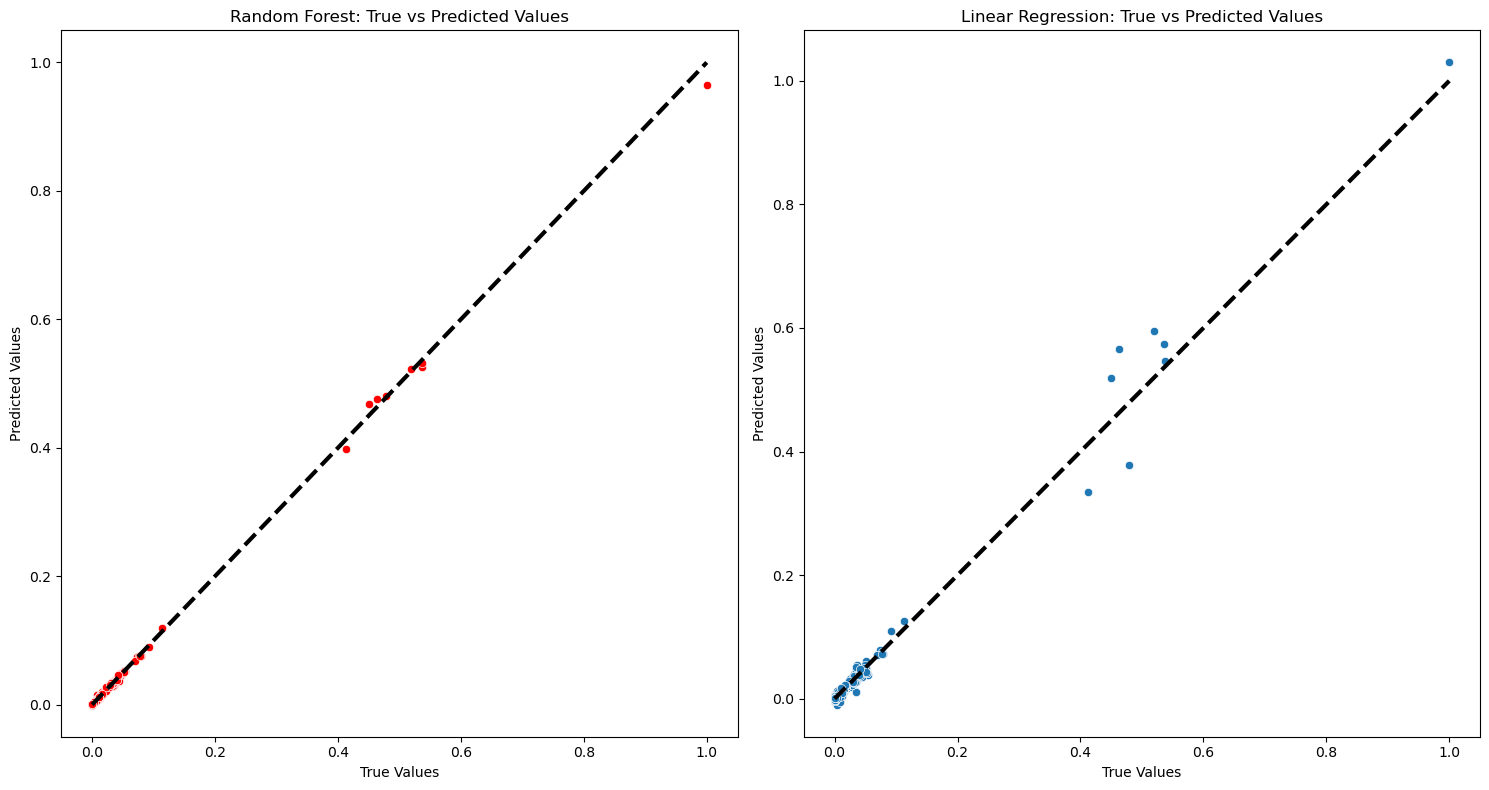

In [49]:
# Plot the predicted vs true values
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8)) #create subplots

#Create random forest scatter plot
sns.scatterplot(x = y_test, y = rf_predict, ax=axes[0], color = 'red') #plot test dataset and prediction data, colour dots red
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3, color='black') #plot correlation line
axes[0].set_xlabel('True Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Random Forest: True vs Predicted Values')

# Plot Linear Regression
sns.scatterplot(x=y_test, y=lr_predict, ax=axes[1])
axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3, color='black')
axes[1].set_title('Linear Regression: True vs Predicted Values')
axes[1].set_xlabel('True Values')
axes[1].set_ylabel('Predicted Values')

# Show the plot
plt.tight_layout()
plt.show()

The data on both graphs fits close to the line which might suggest overfitting. The linear regression model may have less overfitting.

#### Model important features

Electricity from fossil fuels (TWh): 0.93
Renewable-electricity-generating-capacity-per-capita: 0.06
Renewables (% equivalent primary energy): 0.00
Low-carbon electricity (% electricity): 0.00
Energy intensity level of primary energy (MJ/$2017 PPP GDP): 0.00
gdp_growth: 0.00
Primary energy consumption per capita (kWh/person): 0.00
Land Area(Km2): 0.00
Year: 0.00
Access to electricity (% of population): 0.00
Density (P/Km2): 0.00


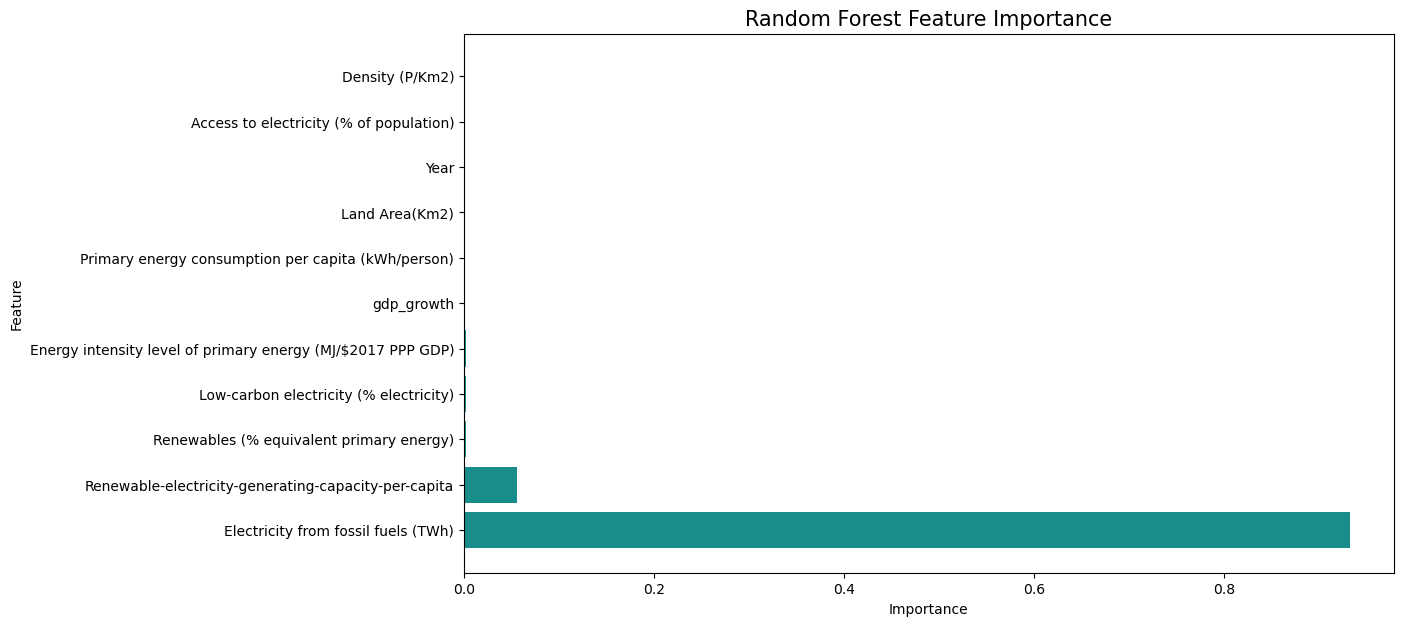

In [50]:
#Important features of random forest model 
importances = rf_model.feature_importances_ #extract feature importance from the RF model

feature_names = X.columns #get names of features from the dataframe

feature_importance_dict = dict(zip(feature_names, importances)) #create a dictionary mapping feature names to their importance

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True) #sort the features in descending order

for feature, importance in sorted_feature_importance: #print each feature and its importance
    print(f"{feature}: {importance:.2f}") #2 decimal places

plt.figure(figsize=(12, 7)) #create plot
plt.barh(*zip(*sorted_feature_importance), alpha=0.9, color='teal') #create horizontal bar plot
plt.title('Random Forest Feature Importance', fontsize=15)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In the random forest model the electricity from fossil fuels seems to be the most important feature, and renewable electricity generating capacity per capita. 

Electricity from fossil fuels (TWh): 1.01
gdp_growth: 0.03
Land Area(Km2): 0.02
Energy intensity level of primary energy (MJ/$2017 PPP GDP): 0.01
Renewables (% equivalent primary energy): 0.01
Density (P/Km2): 0.01
Access to electricity (% of population): 0.00
Low-carbon electricity (% electricity): 0.00
Renewable-electricity-generating-capacity-per-capita: 0.00
Year: -0.00
Primary energy consumption per capita (kWh/person): -0.01


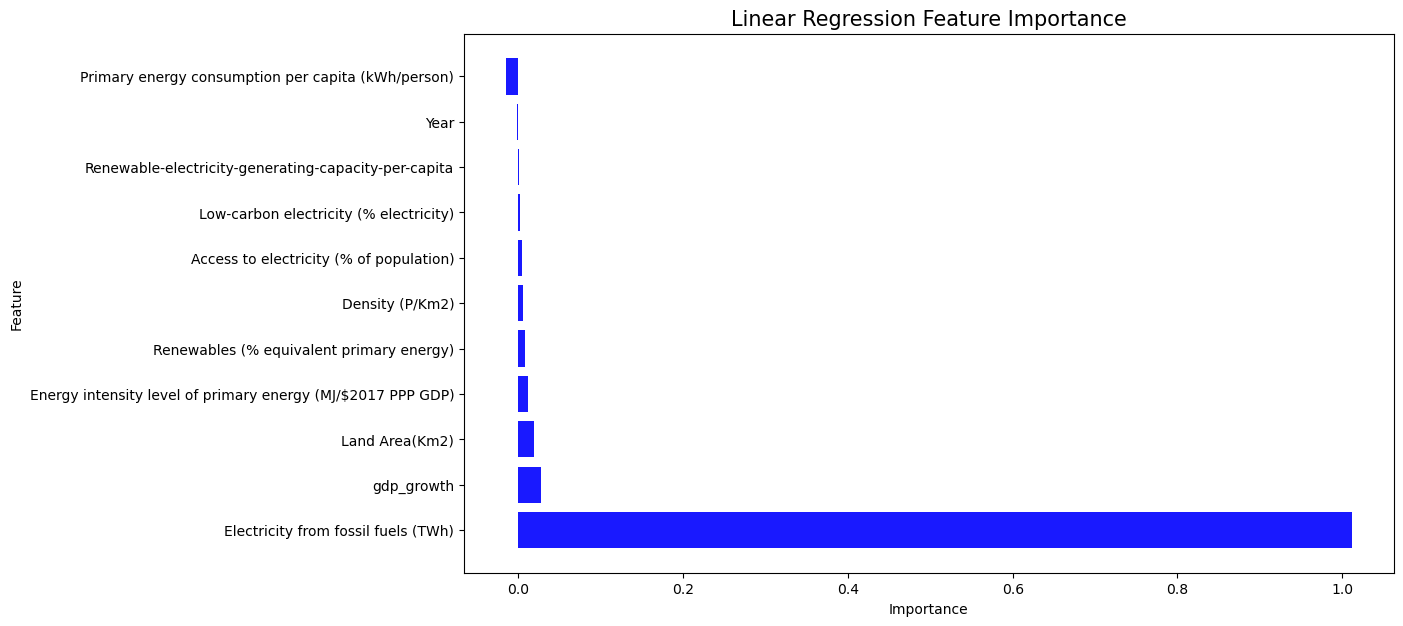

In [51]:
#Important features of linear regression model 
importanceslr = lr_model.coef_ #extract feature importance from the RF model

feature_nameslr = X.columns #get names of features from the dataframe

feature_importance_dictlr = dict(zip(feature_nameslr, importanceslr)) #create a dictionary mapping feature names to their importance

sorted_feature_importancelr = sorted(feature_importance_dictlr.items(), key=lambda x: x[1], reverse=True) #sort the features in descending order

for feature, importance in sorted_feature_importancelr:  #print each feature and its importance
    print(f"{feature}: {importance:.2f}")

plt.figure(figsize=(12, 7))
plt.barh(*zip(*sorted_feature_importancelr), alpha=0.9, color='blue')
plt.title('Linear Regression Feature Importance', fontsize=15)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In the linear regression model the electricity from fossil fuels is also the most important feature but other features such as land area, renewables and energy intensity are important but to a lesser degree.